In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
import umap

In [2]:
# Data from https://www.kaggle.com/teertha/personal-loan-modeling
mdl = pd.read_csv(r'OneDrive/Documents/Continued Education/Thinkful/Data Science Flex/Capstone 3/Bank_Personal_Loan_Modelling.csv')

In [3]:
mdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
mdl.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
mdl.drop(columns = ['ID', 'ZIP Code'], inplace = True)

In [6]:
mdl['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [7]:
mdl['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [8]:
mdl['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [9]:
mdl['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [10]:
mdl['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [11]:
np.random.seed(123)

X= mdl.iloc[:]
y = mdl['Personal Loan'].iloc[:]

print(X.shape, y.shape)

(5000, 12) (5000,)


In [12]:
# I want to first see which dimensionality reduction technique works best for this data set.
# You just want the first two principal components
pca = PCA(n_components=2)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)

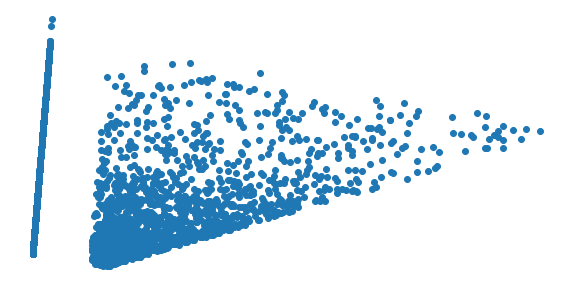

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [14]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.028s...
[t-SNE] Computed neighbors for 5000 samples in 0.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 4.005426
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.619980
[t-SNE] KL divergence after 300 iterations: 1.364198
t-SNE done! Time elapsed: 6.534233093261719 seconds


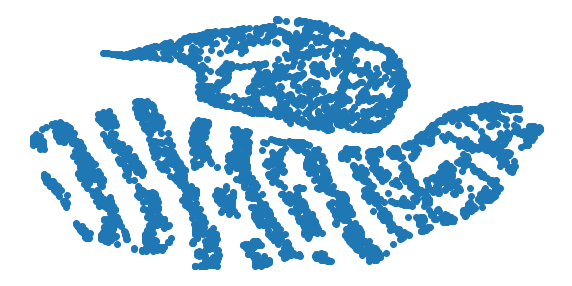

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [16]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 15.201437950134277 seconds


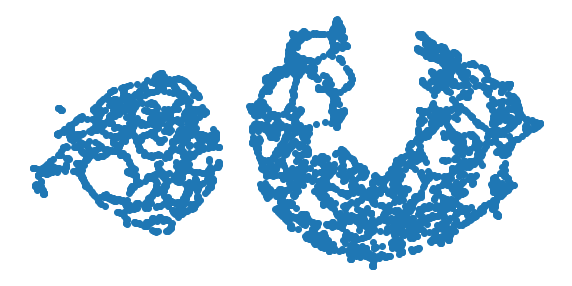

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [18]:
# Given that less than 10% of the people who were offered loans accepted them, PCA gives the best dimensionality reduction model here.

In [19]:
# Now, I'm moving to the second step of seeing which clustering technique works best for this data set. I will be testing K-means, hierarchical clustering, DBSCAN, and Gaussian Mixture Model against each other. I will be measuring the clustering using ARI and silhouette scores.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [20]:
# Using K-means
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

59 ms ± 5.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


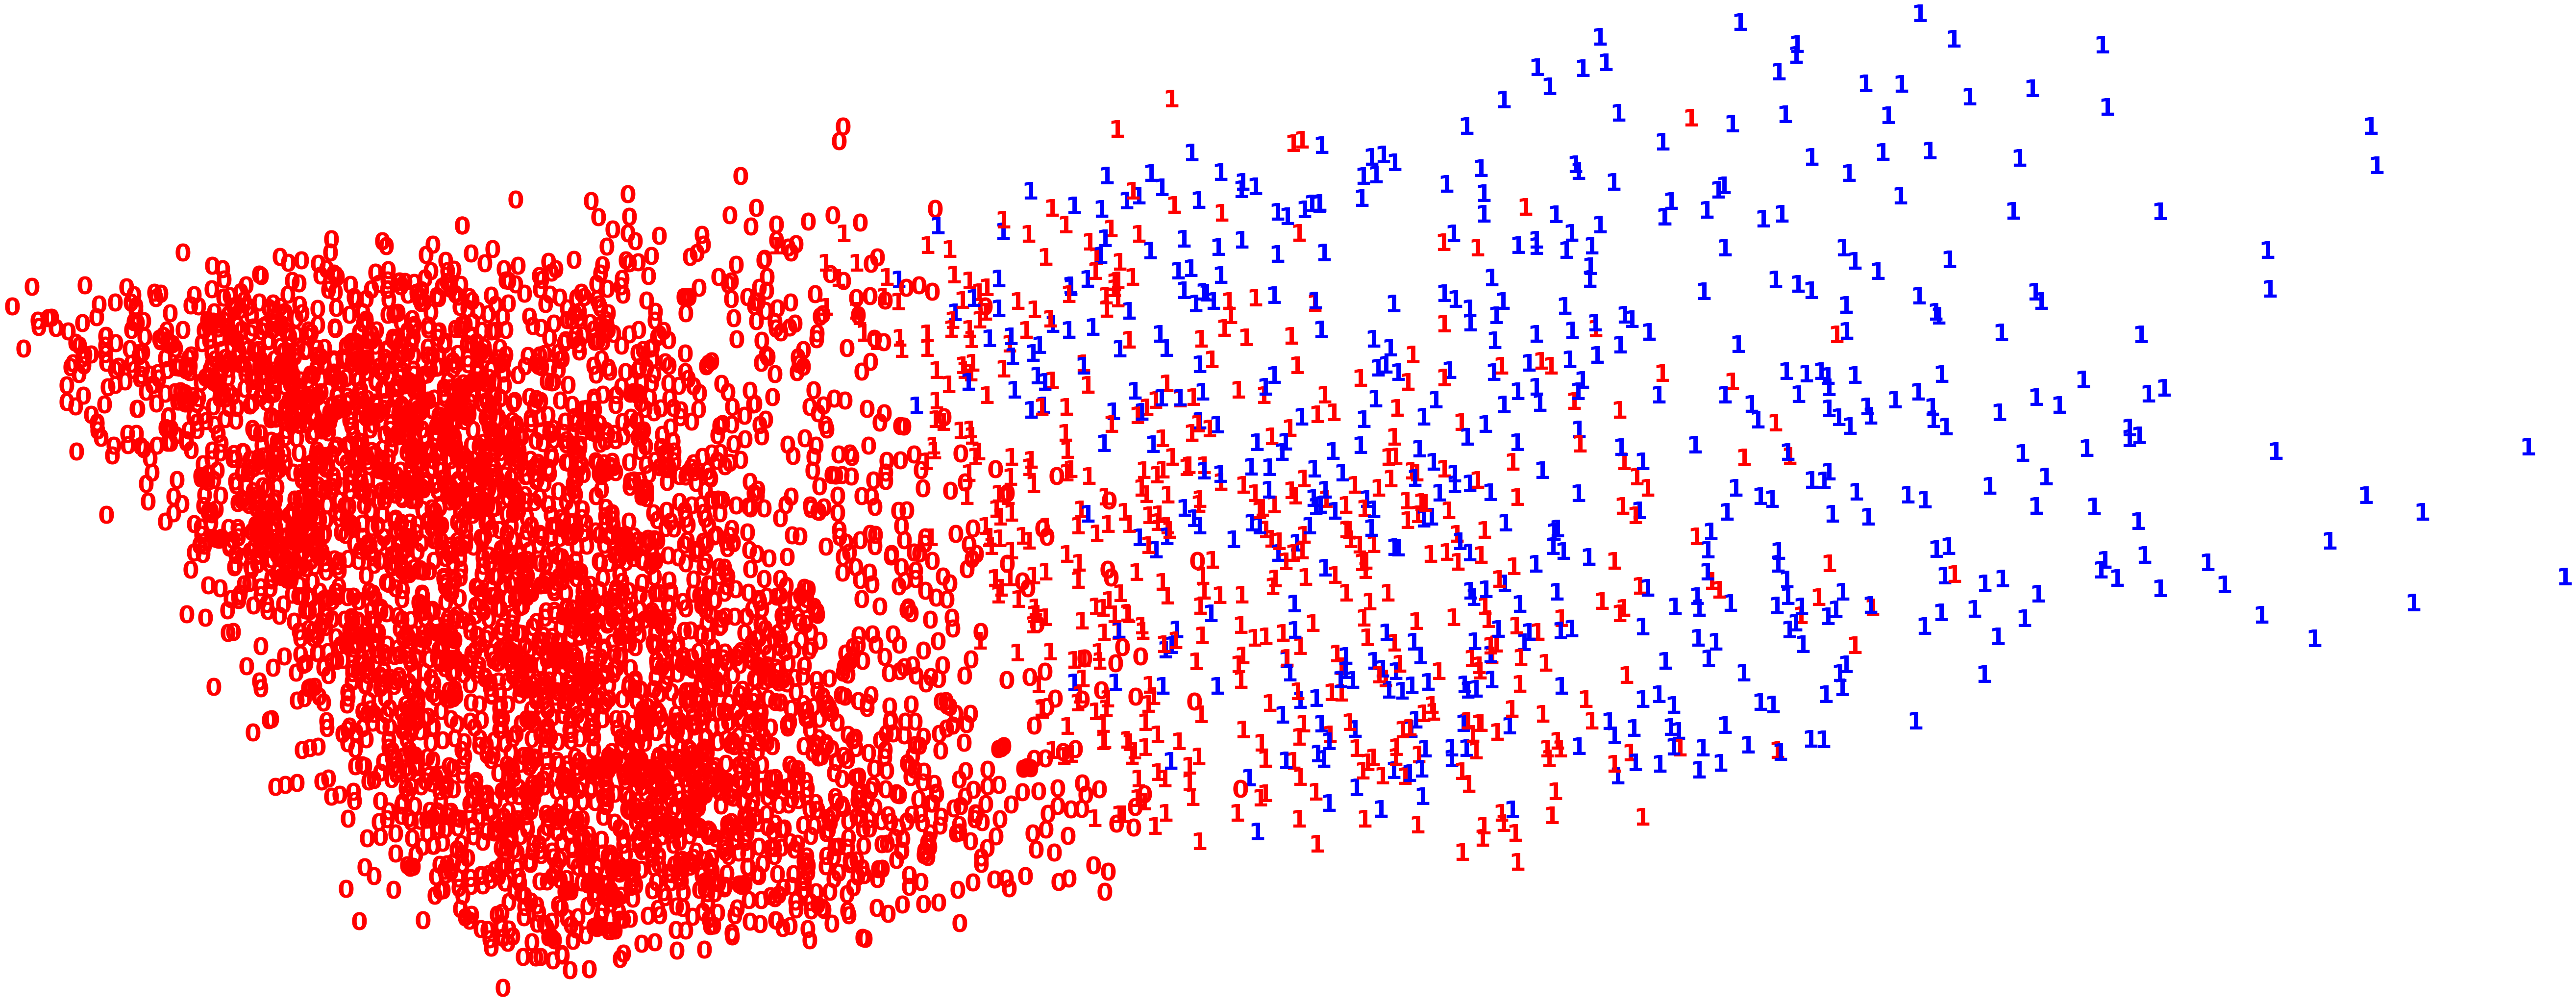

In [21]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(1, pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [22]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.549899774887159
The silhouette score of the Agglomerative Clustering solution: 0.2644698602087612


In [23]:
# Using hierarchical clustering
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
agg_pred = agg_cluster.fit_predict(X_std)

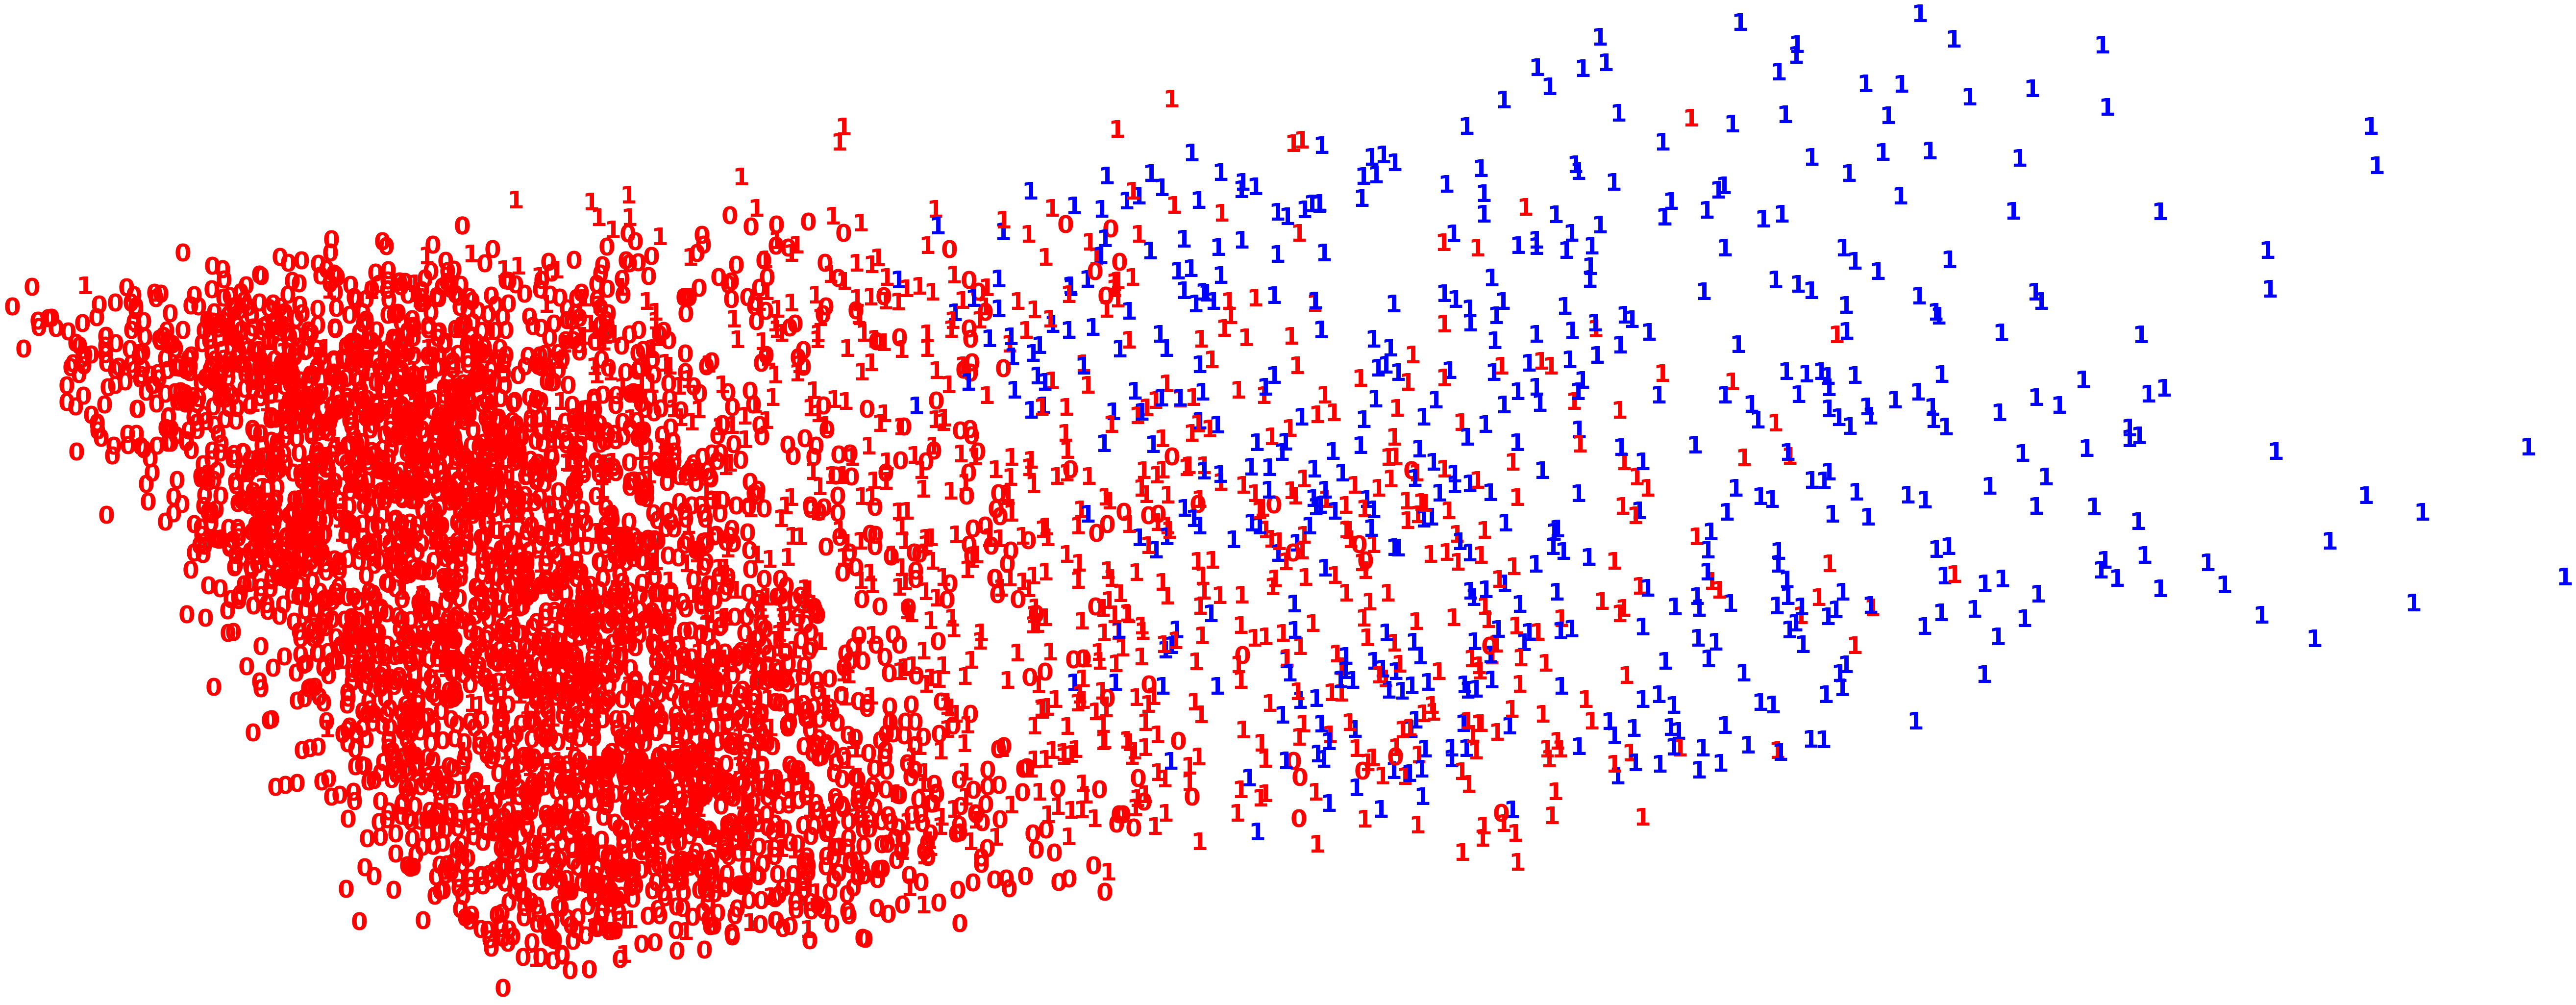

In [24]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(1, pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(agg_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [25]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, agg_pred)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, agg_pred, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.29271448610129314
The silhouette score of the Agglomerative Clustering solution: 0.21268740091969662


In [26]:
# Using DBSCAN
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
db_pred = dbscan_cluster.fit_predict(X_std)

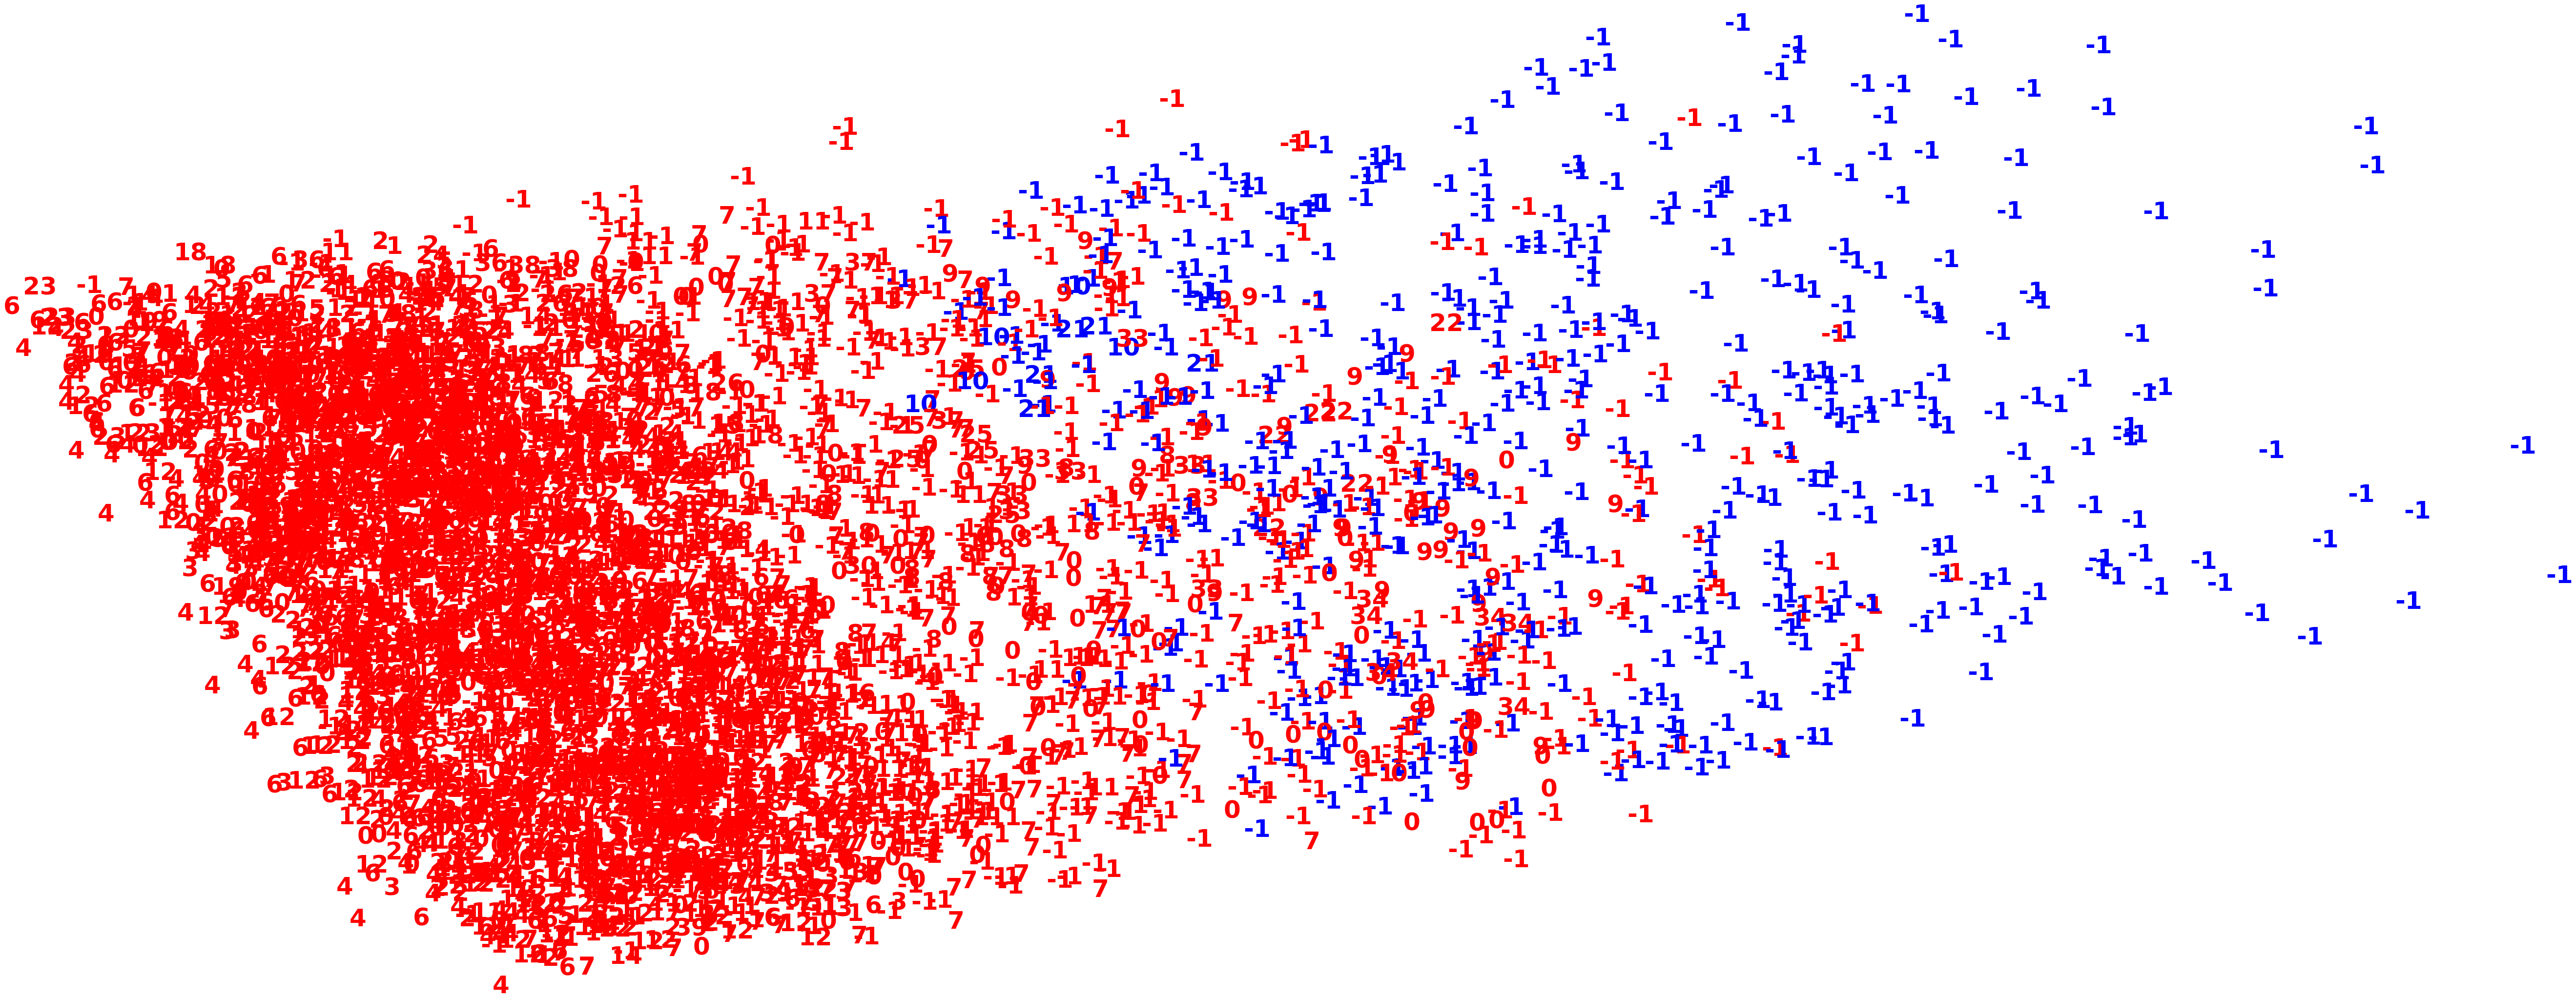

In [27]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(1, pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(db_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [28]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, db_pred)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, db_pred, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: -0.04526244284046333
The silhouette score of the Agglomerative Clustering solution: -0.14973109120809308


In [29]:
# Using Gaussian Mixture Model
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
gmm_pred = gmm_cluster.fit_predict(X_std)

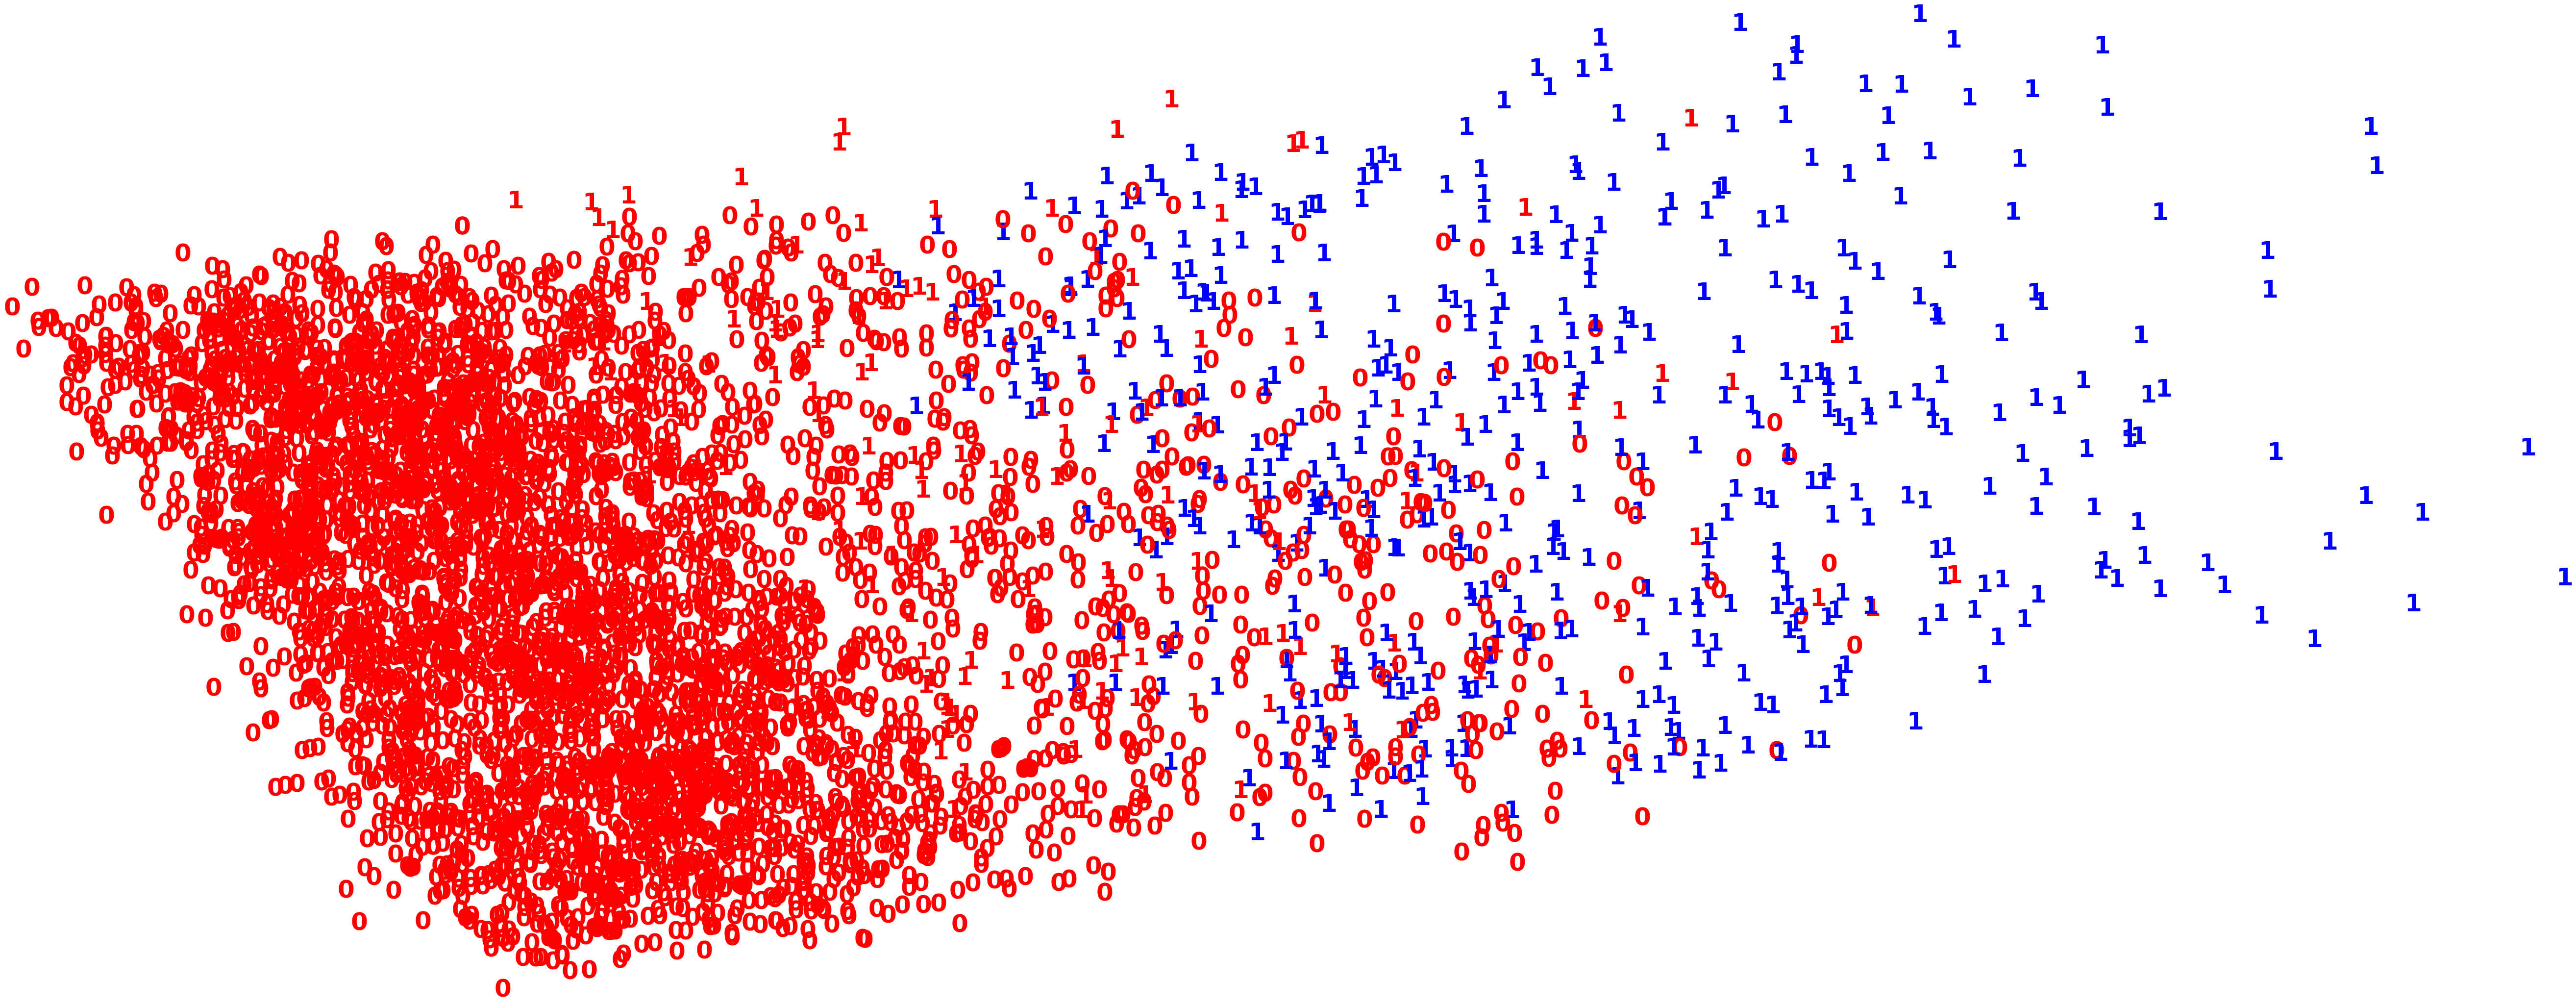

In [30]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(1, pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gmm_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [31]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, gmm_pred)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, gmm_pred, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.8038654596260479
The silhouette score of the Agglomerative Clustering solution: 0.31736913561367525


In [32]:
# Gaussian Mixture Model gives the best ARI and silhouette scores by far.

In [33]:
# Checking the features for significant differences in the populations that accepted loans versus those that didn't
import scipy.stats as stats
import math

In [34]:
def description(group_1, group_2):
    print(stats.describe(group_1))
    print(stats.describe(group_2))

In [35]:
mdl['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Age'}, xlabel='Personal Loan'>

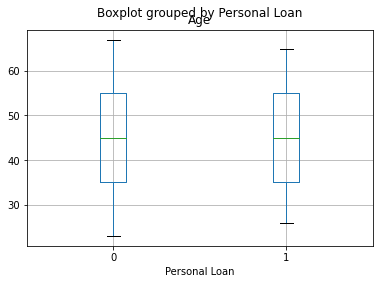

In [36]:
# Checking age
mdl.boxplot('Age', by = 'Personal Loan')

In [37]:
loan = mdl[mdl['Personal Loan'] == 1]
nloan = mdl[mdl['Personal Loan'] == 0]

In [38]:
description(loan['Age'], nloan['Age'])

DescribeResult(nobs=480, minmax=(26, 65), mean=45.06666666666667, variance=134.35045233124566, skewness=0.05259786212972048, kurtosis=-1.2090720396288261)
DescribeResult(nobs=4520, minmax=(23, 67), mean=45.36725663716814, variance=131.11227129504334, skewness=-0.03816013676547753, kurtosis=-1.146217066686668)


In [39]:
stats.kruskal(loan['Age'], nloan['Age'])

KruskalResult(statistic=0.3321680946804541, pvalue=0.5643852156798705)

<AxesSubplot:title={'center':'Experience'}, xlabel='Personal Loan'>

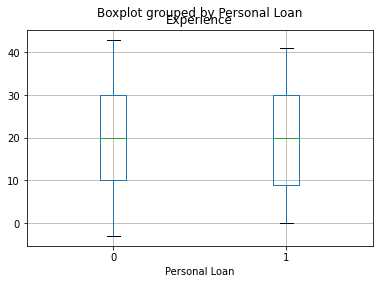

In [40]:
# Checking experience
mdl.boxplot('Experience', by = 'Personal Loan')

In [41]:
description(loan['Experience'], nloan['Experience'])

DescribeResult(nobs=480, minmax=(0, 41), mean=19.84375, variance=134.15298799582465, skewness=0.0524871164904742, kurtosis=-1.1859088355345198)
DescribeResult(nobs=4520, minmax=(-3, 43), mean=20.132300884955754, variance=131.25534057773766, skewness=-0.03479428584006434, kurtosis=-1.1138505028784556)


In [42]:
stats.kruskal(loan['Experience'], nloan['Experience'])

KruskalResult(statistic=0.31239673279635105, pvalue=0.5762131649120161)

<AxesSubplot:title={'center':'Income'}, xlabel='Personal Loan'>

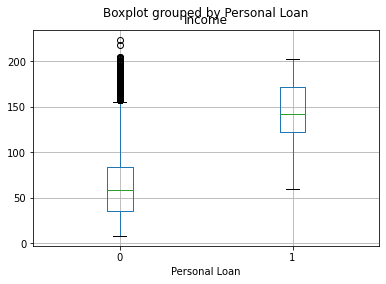

In [43]:
# Checking income
mdl.boxplot('Income', by = 'Personal Loan')

In [44]:
description(loan['Income'], nloan['Income'])

DescribeResult(nobs=480, minmax=(60, 203), mean=144.74583333333334, variance=997.5761830201809, skewness=-0.23919806965292317, kurtosis=-0.8074524780653203)
DescribeResult(nobs=4520, minmax=(8, 224), mean=66.23738938053097, variance=1646.6174554535717, skewness=1.0286847758027666, kurtosis=0.7948926798465696)


In [45]:
stats.kruskal(loan['Income'], nloan['Income'])

KruskalResult(statistic=927.4951991218743, pvalue=1.0346506910208504e-203)

<AxesSubplot:title={'center':'Family'}, xlabel='Personal Loan'>

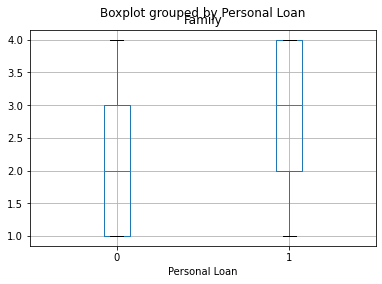

In [46]:
# Checking family size
mdl.boxplot('Family', by = 'Personal Loan')

In [47]:
description(loan['Family'], nloan['Family'])

DescribeResult(nobs=480, minmax=(1, 4), mean=2.6125, variance=1.2441022964509394, skewness=-0.16160910214342936, kurtosis=-1.3267370742915454)
DescribeResult(nobs=4520, minmax=(1, 4), mean=2.3734513274336284, variance=1.31967562719452, skewness=0.18966557461538183, kurtosis=-1.3947002402814357)


In [48]:
stats.kruskal(loan['Family'], nloan['Family'])

KruskalResult(statistic=19.06612960072158, pvalue=1.2626603370719087e-05)

<AxesSubplot:title={'center':'CCAvg'}, xlabel='Personal Loan'>

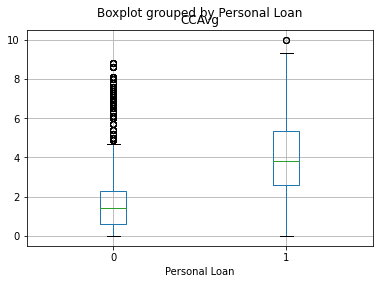

In [49]:
# Checking credit card spending
mdl.boxplot('CCAvg', by = 'Personal Loan')

In [50]:
description(loan['CCAvg'], nloan['CCAvg'])

DescribeResult(nobs=480, minmax=(0.0, 10.0), mean=3.905354166666667, variance=4.400266262613083, skewness=0.24985480383121744, kurtosis=-0.3065185486398194)
DescribeResult(nobs=4520, minmax=(0.0, 8.8), mean=1.7290088495575222, variance=2.457518203063956, skewness=1.863483839458935, kurtosis=4.239531210720947)


In [51]:
stats.kruskal(loan['CCAvg'], nloan['CCAvg'])

KruskalResult(statistic=492.7471108850918, pvalue=3.5981184502523323e-109)

<AxesSubplot:title={'center':'Education'}, xlabel='Personal Loan'>

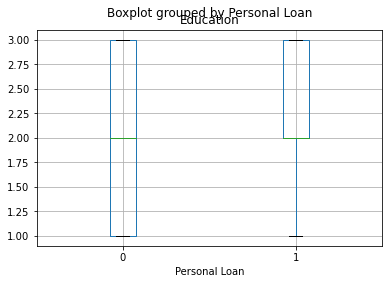

In [52]:
# Checking educational background
mdl.boxplot('Education', by = 'Personal Loan')

In [53]:
description(loan['Education'], nloan['Education'])

DescribeResult(nobs=480, minmax=(1, 3), mean=2.2333333333333334, variance=0.5675713291579678, skewness=-0.4125266317028699, kurtosis=-1.1391045288767012)
DescribeResult(nobs=4520, minmax=(1, 3), mean=1.8435840707964601, variance=0.705557410500796, skewness=0.3011525592458474, kurtosis=-1.5181623826906343)


In [54]:
stats.kruskal(loan['Education'], nloan['Education'])

KruskalResult(statistic=97.27045108762866, pvalue=6.047613485705727e-23)

<AxesSubplot:title={'center':'Mortgage'}, xlabel='Personal Loan'>

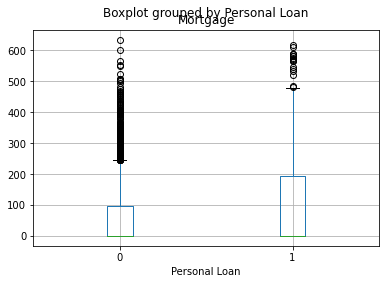

In [55]:
# Checking mortgage amount
mdl.boxplot('Mortgage', by = 'Personal Loan')

In [56]:
description(loan['Mortgage'], nloan['Mortgage'])

DescribeResult(nobs=480, minmax=(0, 617), mean=100.84583333333333, variance=25872.034638135006, skewness=1.4484829124423928, kurtosis=0.9830916208321989)
DescribeResult(nobs=4520, minmax=(0, 635), mean=51.78938053097345, variance=8471.16474668411, skewness=1.9954683540048517, kurtosis=4.2159669047836985)


In [57]:
stats.kruskal(loan['Mortgage'], nloan['Mortgage'])

KruskalResult(statistic=20.02656762771378, pvalue=7.637365616001567e-06)

<AxesSubplot:title={'center':'Securities Account'}, xlabel='Personal Loan'>

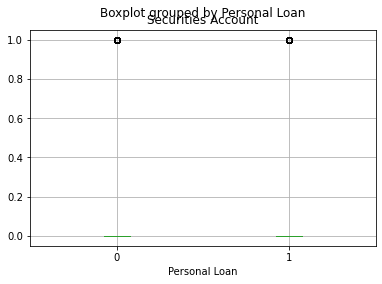

In [58]:
# Checking securities account
mdl.boxplot('Securities Account', by = 'Personal Loan')

In [59]:
description(loan['Securities Account'], nloan['Securities Account'])

DescribeResult(nobs=480, minmax=(0, 1), mean=0.125, variance=0.10960334029227557, skewness=2.2677868380553634, kurtosis=3.1428571428571432)
DescribeResult(nobs=4520, minmax=(0, 1), mean=0.10221238938053097, variance=0.09178532332511502, skewness=2.6262899631117094, kurtosis=4.897398970341304)


In [60]:
stats.kruskal(loan['Securities Account'], nloan['Securities Account'])

KruskalResult(statistic=2.409382748897378, pvalue=0.12060991420365211)

<AxesSubplot:title={'center':'CD Account'}, xlabel='Personal Loan'>

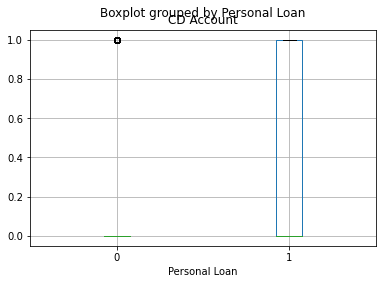

In [61]:
# Checking CD account
mdl.boxplot('CD Account', by = 'Personal Loan')

In [62]:
description(loan['CD Account'], nloan['CD Account'])

DescribeResult(nobs=480, minmax=(0, 1), mean=0.2916666666666667, variance=0.20702853166318724, skewness=0.9166984970282109, kurtosis=-1.1596638655462197)
DescribeResult(nobs=4520, minmax=(0, 1), mean=0.03584070796460177, variance=0.034563798475267644, skewness=4.993836959998374, kurtosis=22.938407583045798)


In [63]:
stats.kruskal(loan['CD Account'], nloan['CD Account'])

KruskalResult(statistic=500.3018100909869, pvalue=8.171514404291868e-111)

<AxesSubplot:title={'center':'CreditCard'}, xlabel='Personal Loan'>

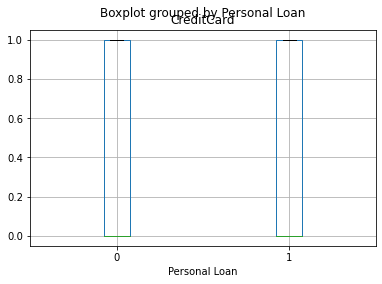

In [64]:
# Checking for credit card
mdl.boxplot('CreditCard', by = 'Personal Loan')

In [65]:
description(loan['CreditCard'], nloan['CreditCard'])

DescribeResult(nobs=480, minmax=(0, 1), mean=0.29791666666666666, variance=0.20959899095337509, skewness=0.8837282958336273, kurtosis=-1.2190242991429927)
DescribeResult(nobs=4520, minmax=(0, 1), mean=0.29358407079646015, variance=0.207438357612989, skewness=0.9065185985530746, kurtosis=-1.1782240304773692)


In [66]:
stats.kruskal(loan['CreditCard'], nloan['CreditCard'])

KruskalResult(statistic=0.03923441049307525, pvalue=0.8429849923241218)

In [67]:
# Based on the statistical tests, age, experience, having a securities account, and having opened a credit card do not play a significant enough role in the clustering classification while income, family size, credit card usage, education level, mortgage amount, and having a CD account do. The results indicate that those who accepted the loan offer are likely to have higher income, a larger family, higher credit card usage, higher education, higher mortgage, or a CD account. The bank can use this information to plan their marketing campaigns accordingly.

In [68]:
# Making a new model with the non-significant features removed
mdl1 = mdl.copy()

In [69]:
mdl1.drop(columns = ['Age', 'Experience', 'Securities Account', 'CreditCard'], inplace = True)

In [70]:
mdl1.head()

Income  Family  CCAvg  Education  Mortgage  Personal Loan  CD Account  \
0      49       4    1.6          1         0              0           0   
1      34       3    1.5          1         0              0           0   
2      11       1    1.0          1         0              0           0   
3     100       1    2.7          2         0              0           0   
4      45       4    1.0          2         0              0           0   

   Online  
0       0  
1       0  
2       0  
3       0  
4       0

In [71]:
np.random.seed(123)

X= mdl1.iloc[:]
y = mdl1['Personal Loan'].iloc[:]

print(X.shape, y.shape)

(5000, 8) (5000,)


In [72]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

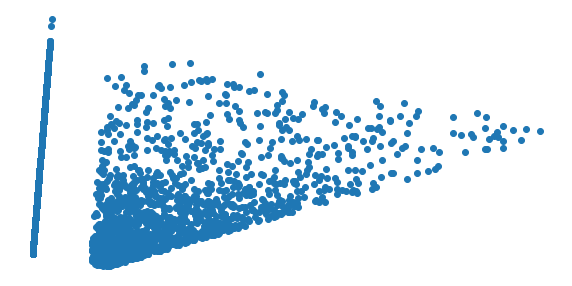

In [73]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [74]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.018s...
[t-SNE] Computed neighbors for 5000 samples in 0.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.500431
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.544586
[t-SNE] KL divergence after 300 iterations: 1.347949
t-SNE done! Time elapsed: 5.780902862548828 seconds


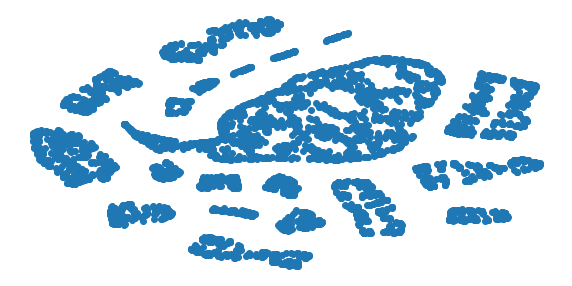

In [75]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [76]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 5.249425172805786 seconds


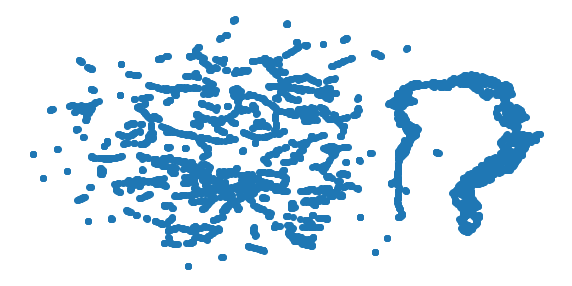

In [77]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [78]:
# PCA still gives the best dimensionality reduction model.

In [79]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [80]:
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

51 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


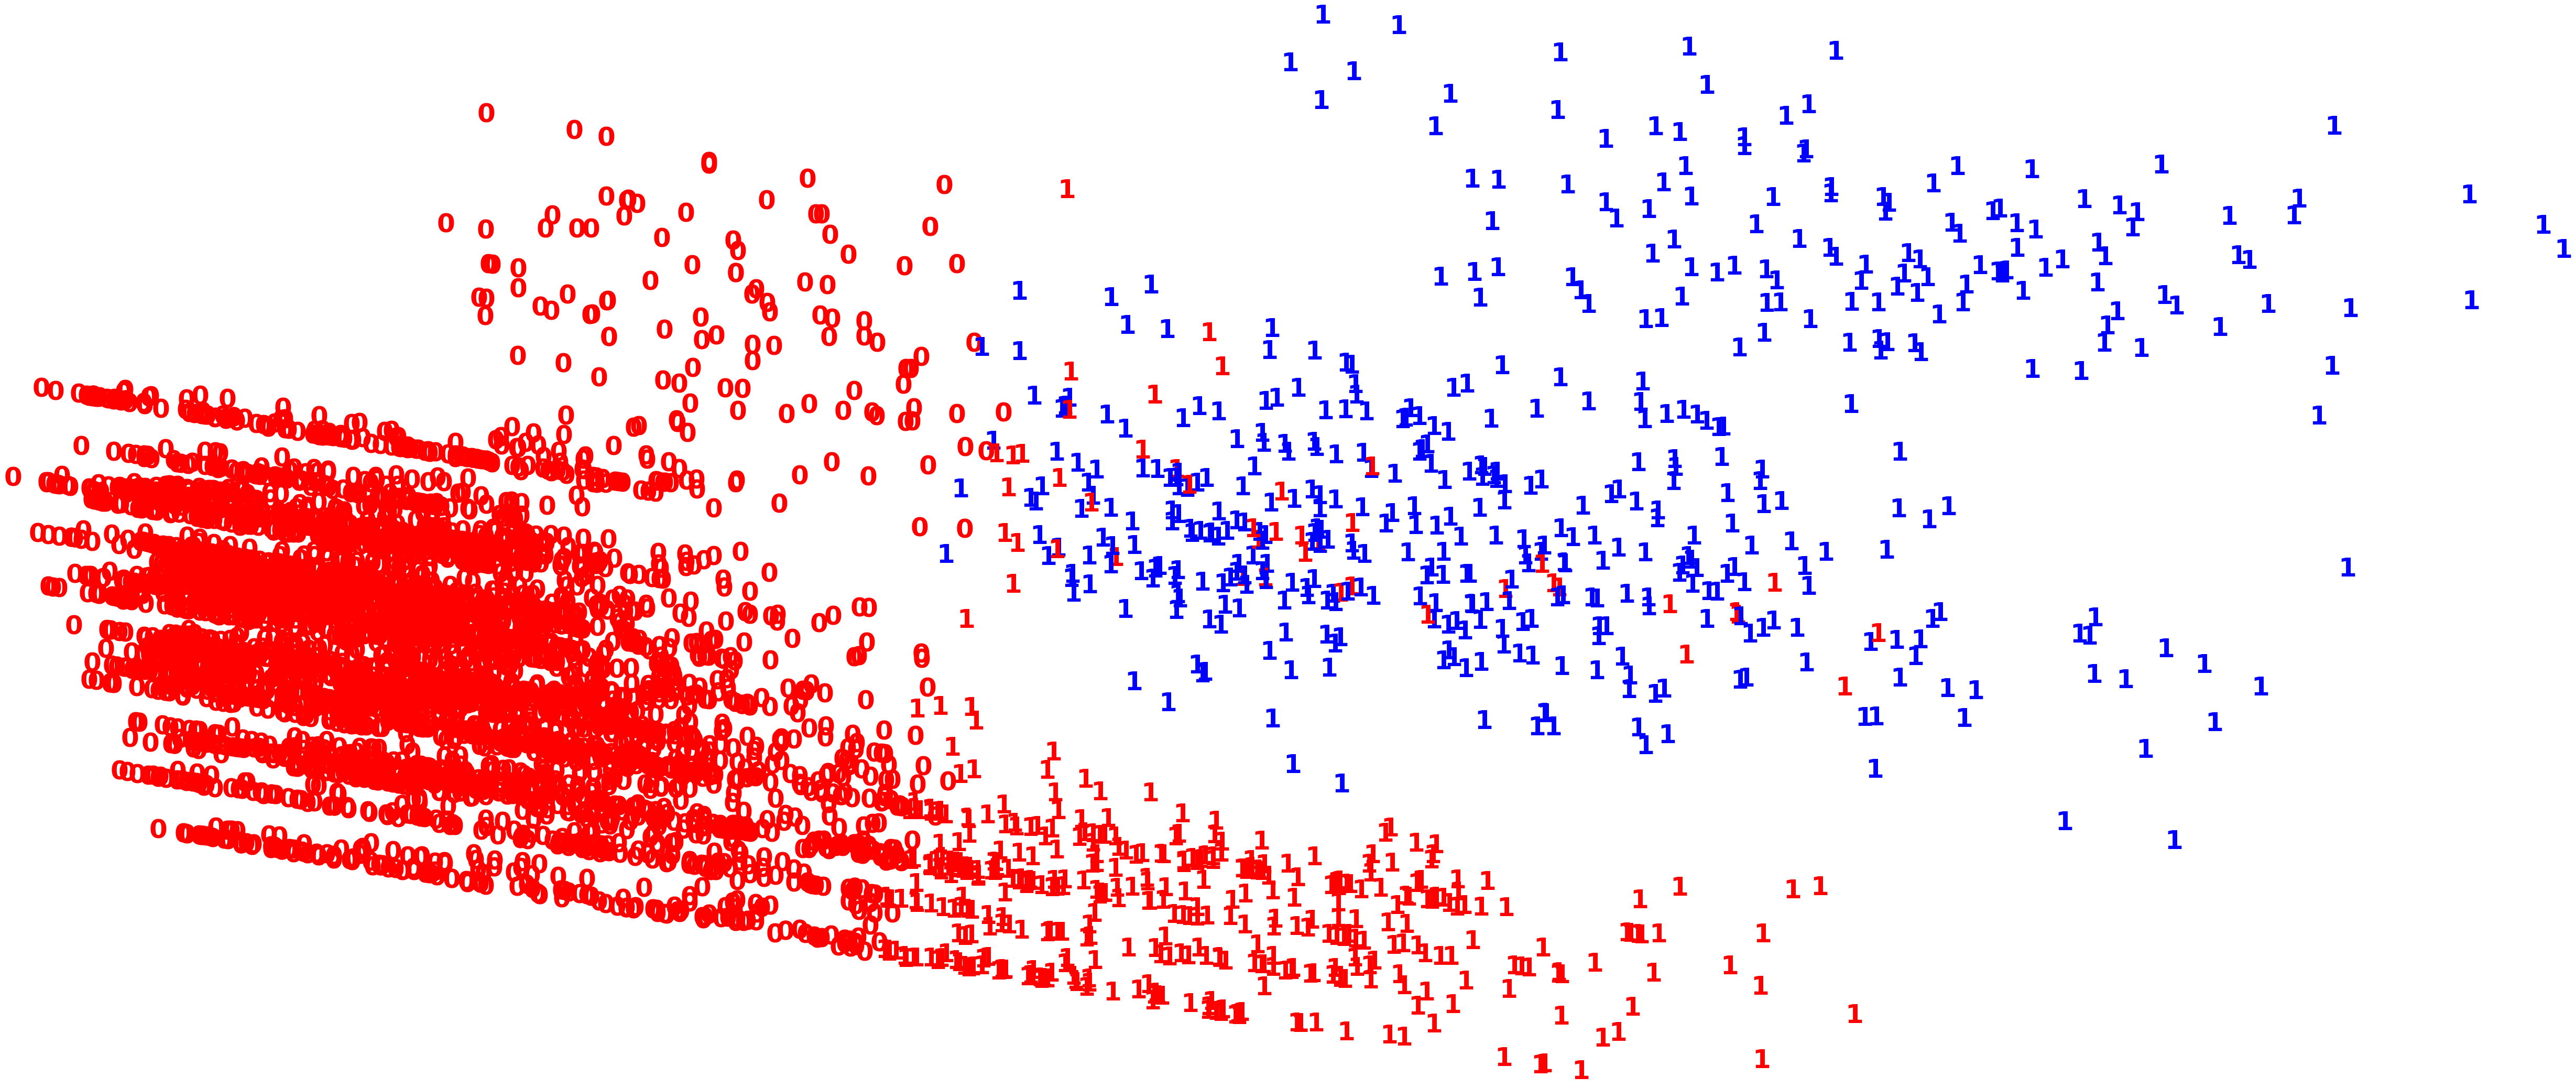

In [81]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(1, pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [82]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.5526144656908434
The silhouette score of the Agglomerative Clustering solution: 0.3582871398529102


In [83]:
# Using hierarchical clustering
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
agg_pred = agg_cluster.fit_predict(X_std)

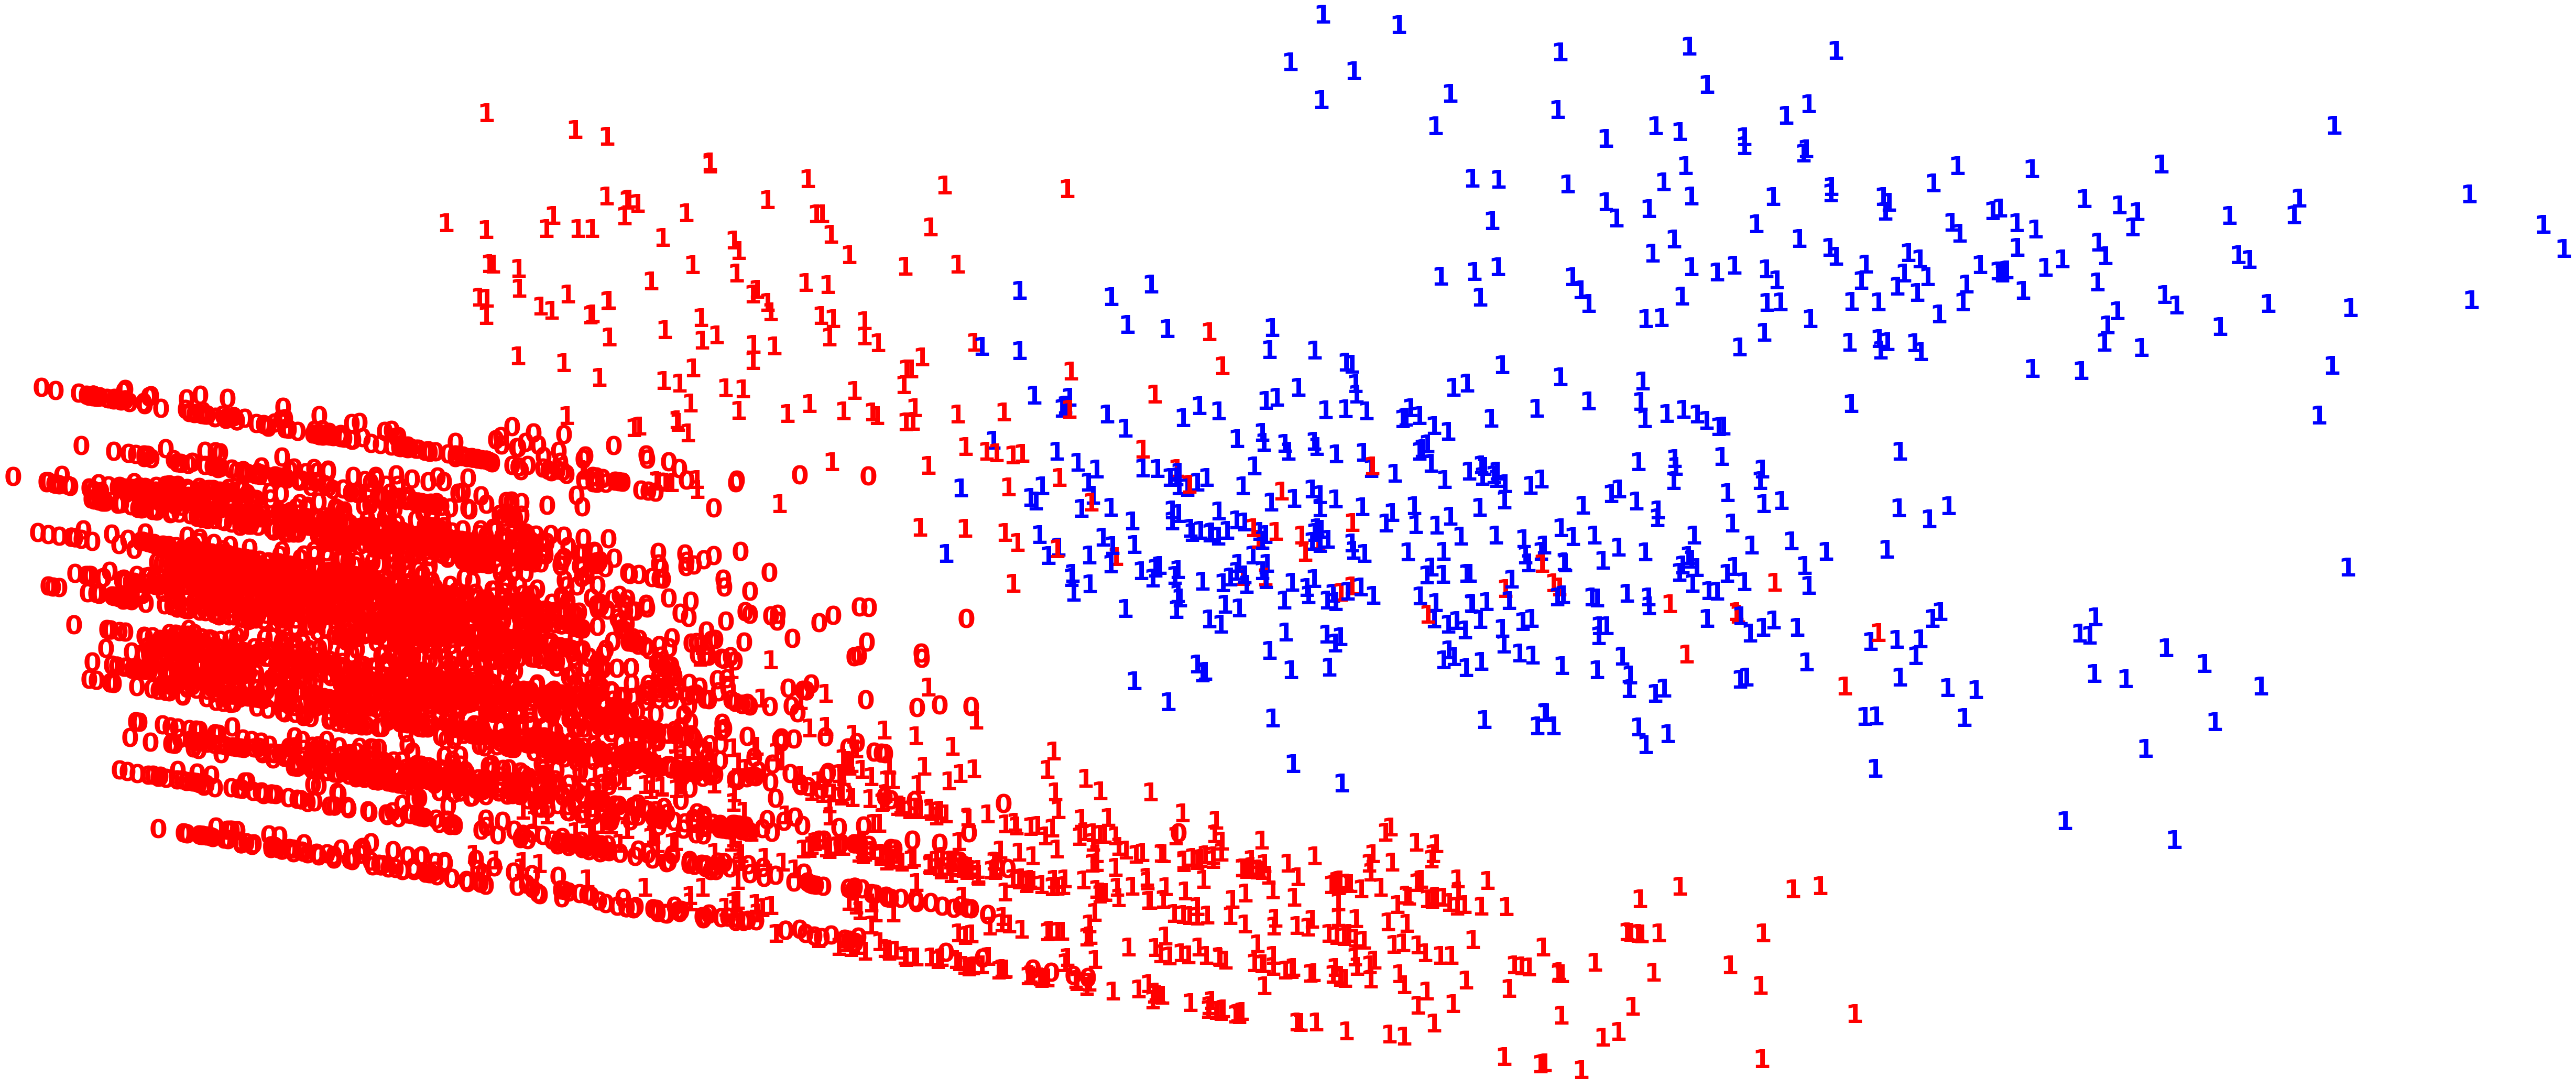

In [84]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(1, pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(agg_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [85]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, agg_pred)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, agg_pred, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.40071189834557924
The silhouette score of the Agglomerative Clustering solution: 0.3212088003972255


In [86]:
# Using DBSCAN
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
db_pred = dbscan_cluster.fit_predict(X_std)

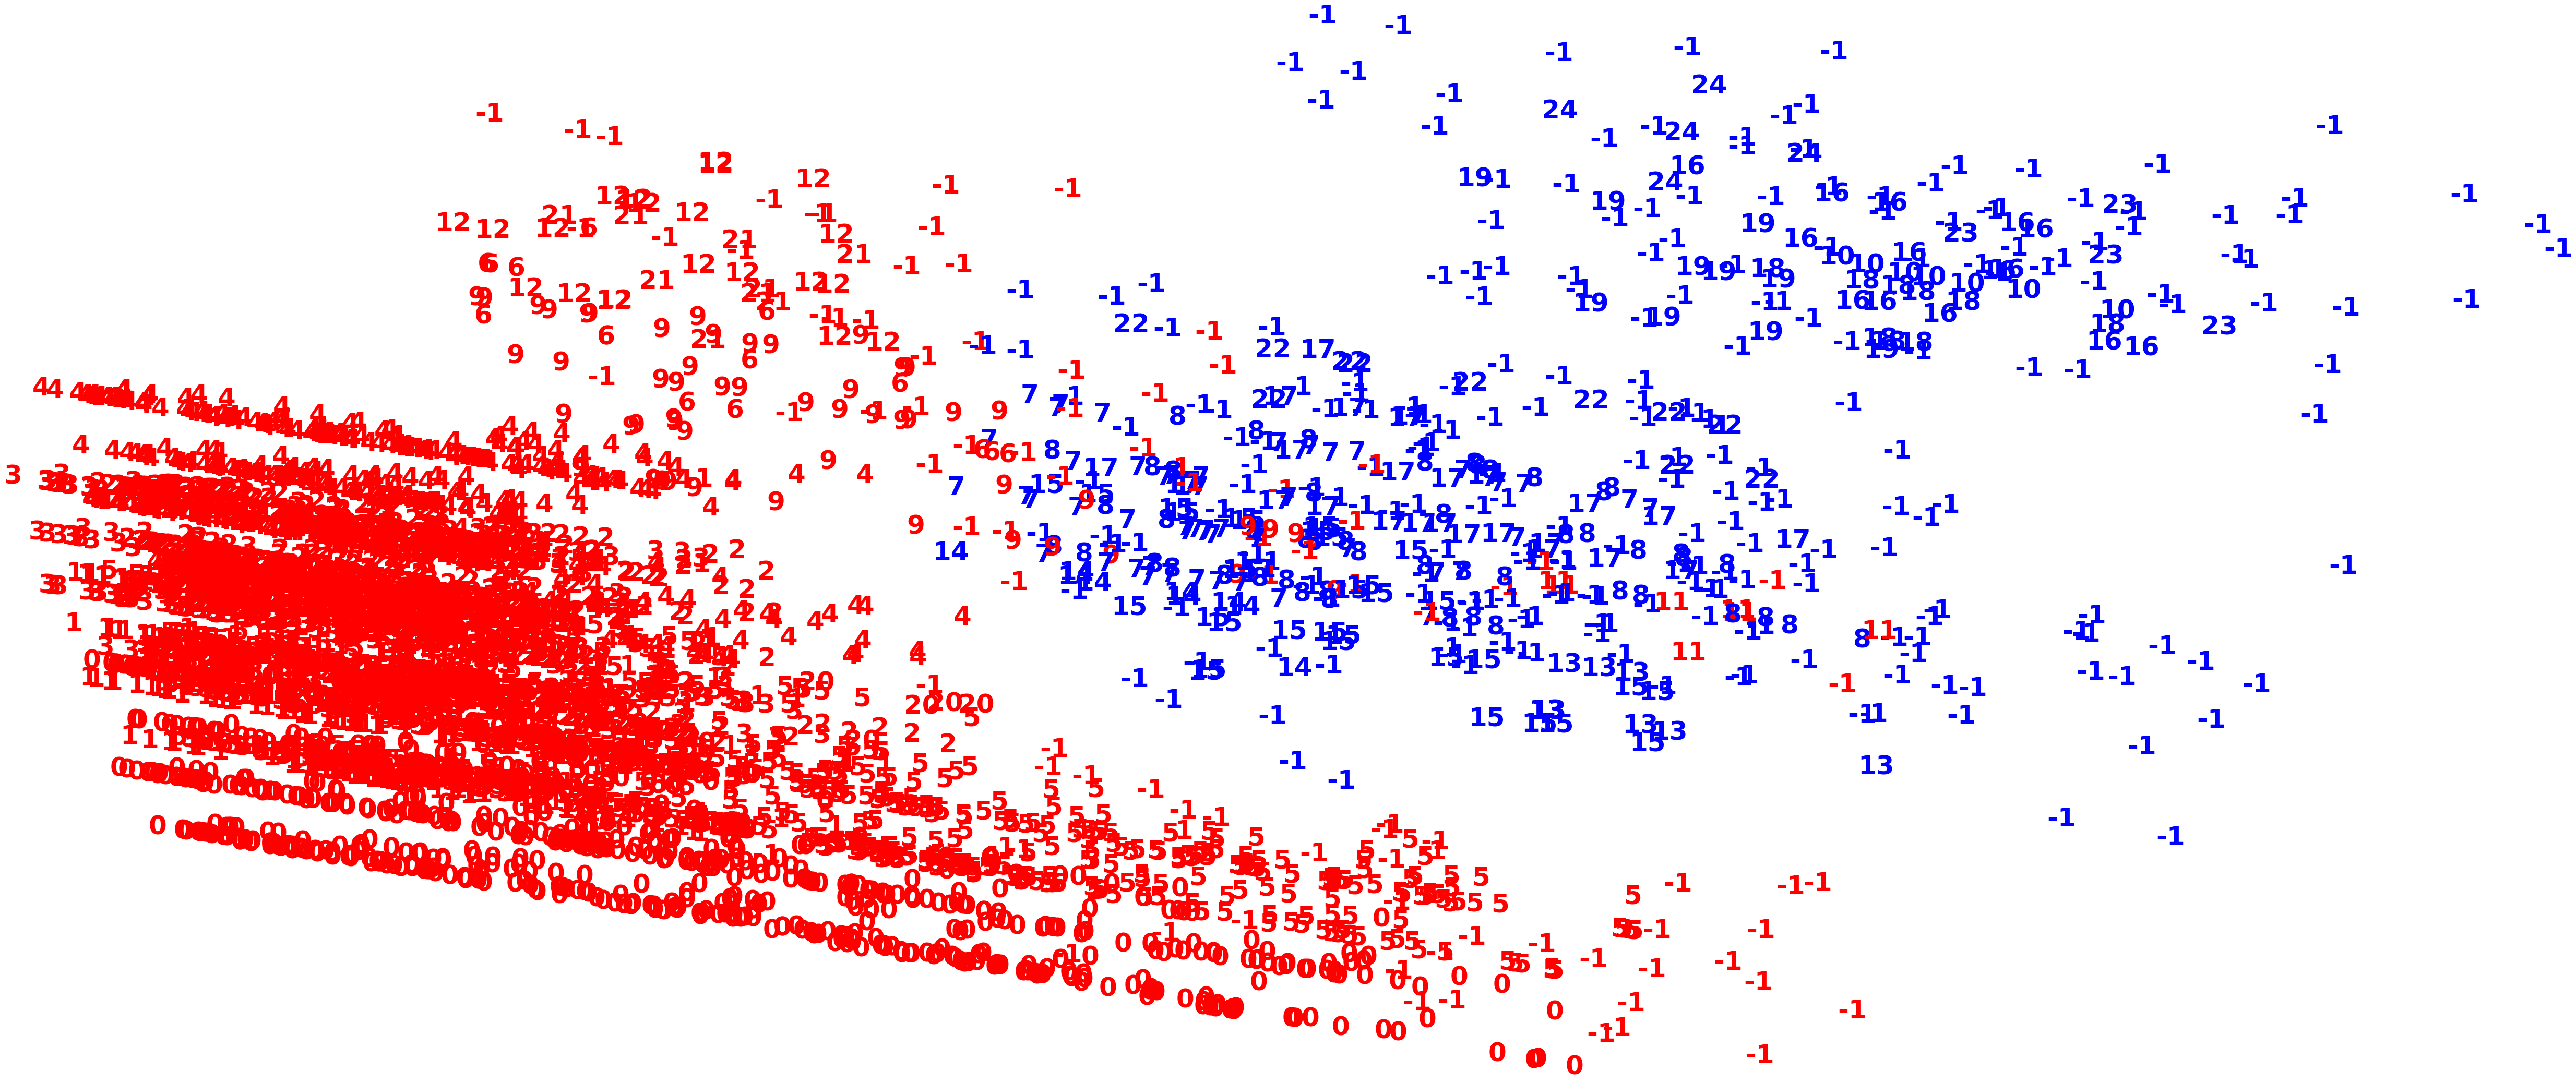

In [87]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(1, pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(db_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [88]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, db_pred)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, db_pred, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.06020095022124628
The silhouette score of the Agglomerative Clustering solution: 0.06725142529843313


In [89]:
# Using Gaussian Mixture Model
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
gmm_pred = gmm_cluster.fit_predict(X_std)

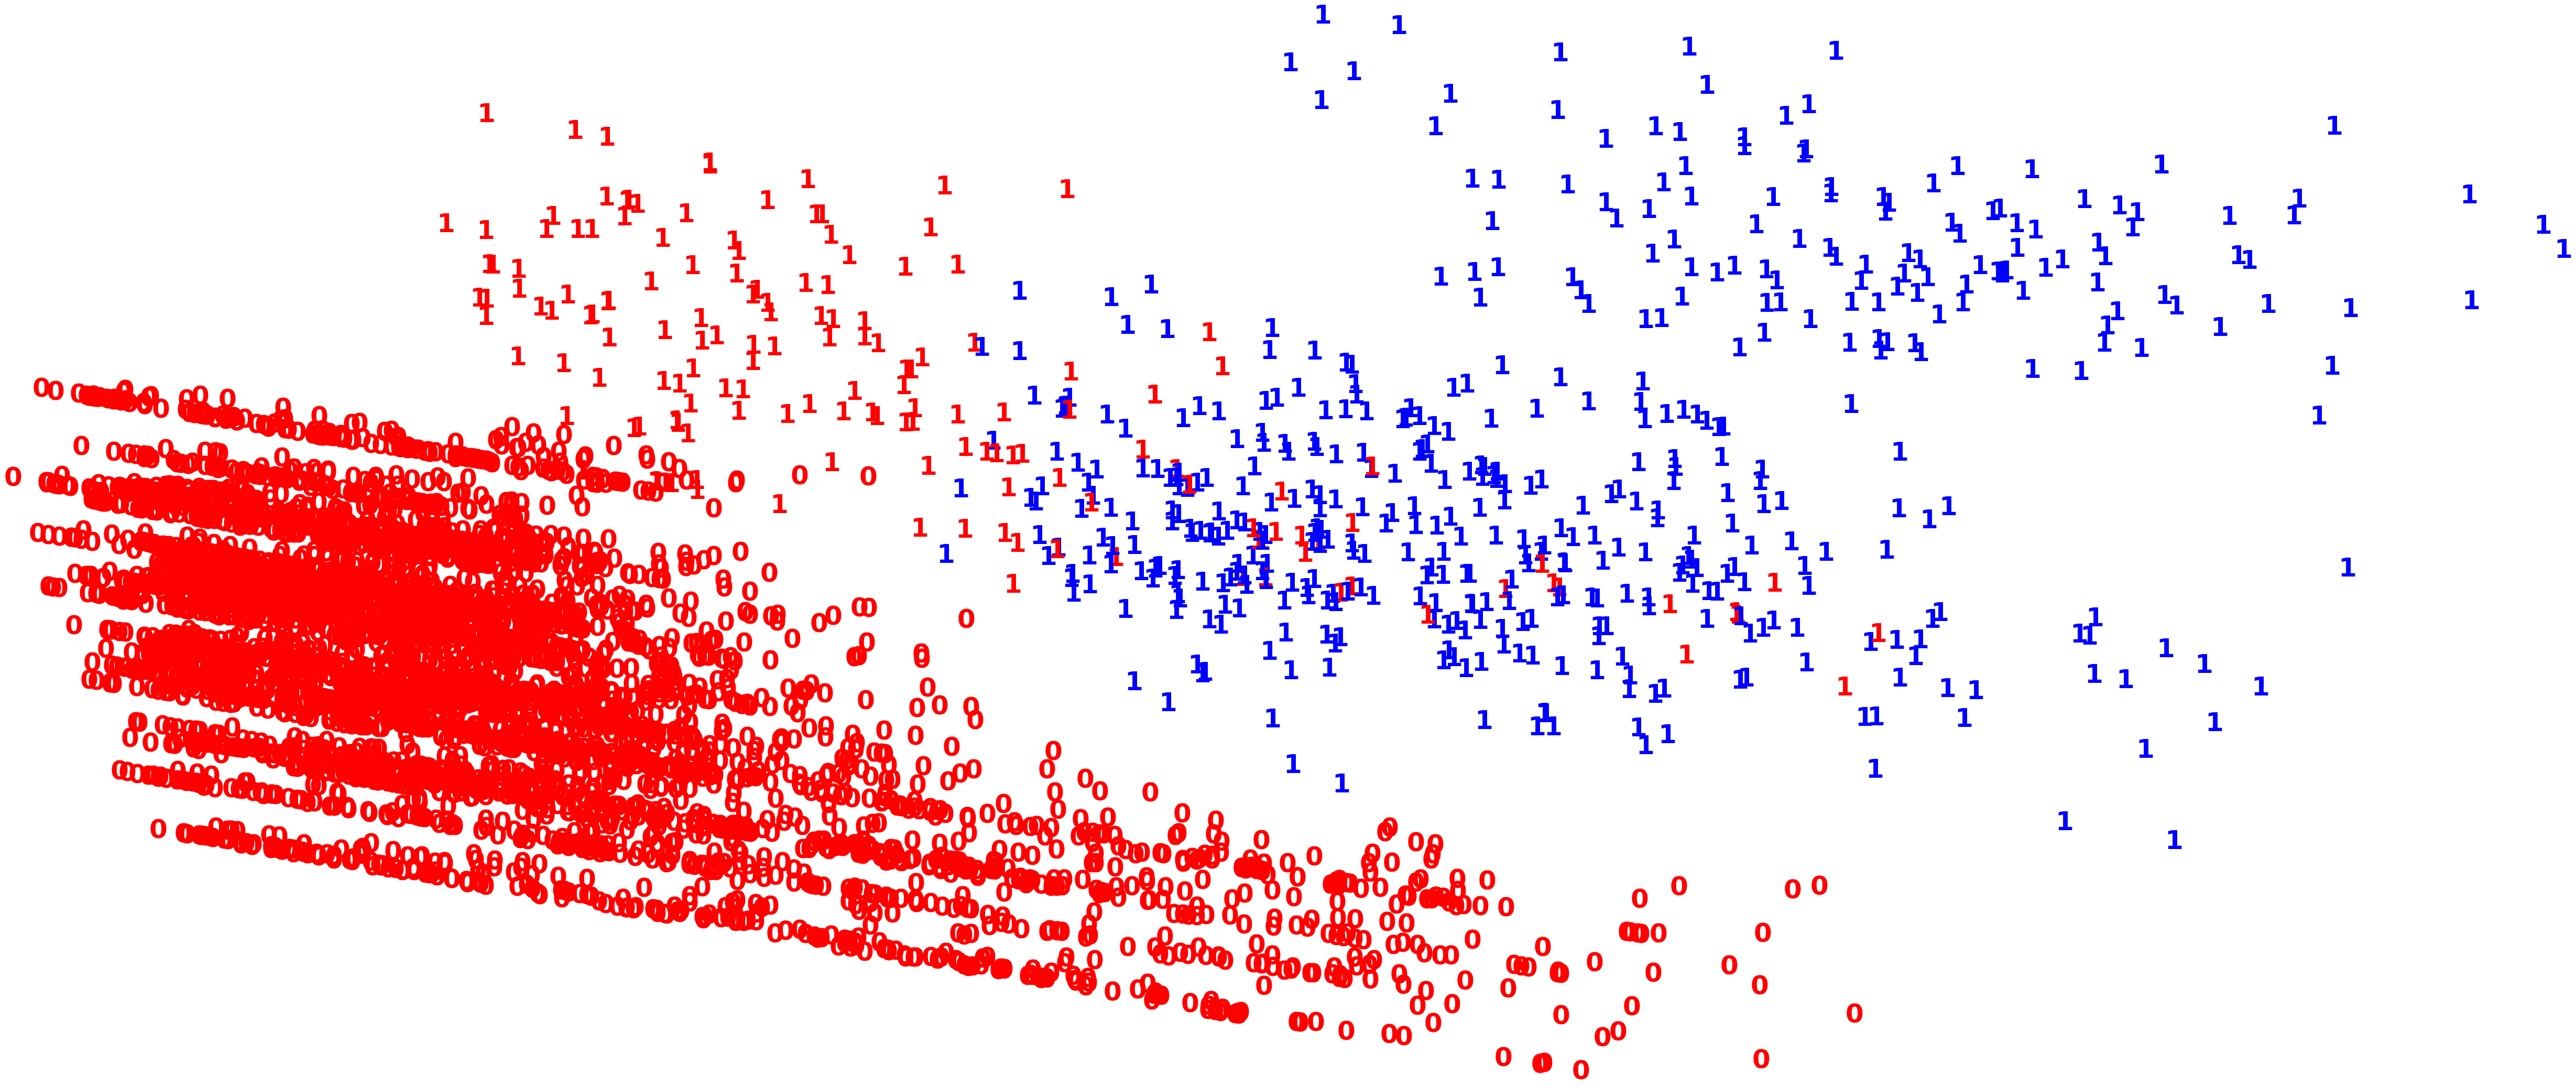

In [90]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(1, pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gmm_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [91]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, gmm_pred)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, gmm_pred, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.8038654596260479
The silhouette score of the Agglomerative Clustering solution: 0.4029501766746351


In [92]:
# By dropping the features that did not contribute to customers' decision-making, we are able to increase the ARI scores a little on some models and silhouette scores across the board. The GMM model is clearly still the best.